In [3]:
import pandas as pd
from matplotlib import pyplot as plt

countries = ['AT', 'BE', 'CZ', 'DE_LU', 'FR', 'HR', 'HU', 'NL', 'PL', 'RO', 'SI', 'SK']
non_fbmc_countries = ['CH', 'GB', 'ES', 'IT_NORD']

forecast_legend = ['IO_{L1}', 'IO_{L1} + IO_{d}', 'IO_{L2}', 'IO_{L2} + IO_{d}']

In [2]:
df_observed = pd.read_excel("./data/day_ahead_prices.xlsx", index_col=0)
df_observed_non_fbmc = pd.read_excel("./data/day_ahead_prices_non_fbmc.xlsx", index_col=0)

# November
start_date_nov = pd.Timestamp('20221101')
end_date_nov = pd.Timestamp('20221201')

# February
start_date_feb = pd.Timestamp('20230201')
end_date_feb = pd.Timestamp('20230301')

df_observed_november = df_observed.loc[(df_observed.index > start_date_nov) & (df_observed.index <= end_date_nov)]
df_observed_non_fbmc_november = df_observed_non_fbmc.loc[(df_observed_non_fbmc.index > start_date_nov) & (df_observed_non_fbmc.index <= end_date_nov)]

df_observed_february = df_observed.loc[(df_observed.index > start_date_feb) & (df_observed.index <= end_date_feb)]
df_observed_non_fbmc_february = df_observed_non_fbmc.loc[(df_observed_non_fbmc.index > start_date_feb) & (df_observed_non_fbmc.index <= end_date_feb)]

df_forecasts_november = []
df_forecasts_february = []

df_forecasts_november.append(pd.read_excel("price_forecast_norm_1_w_atc_november.xlsx"))
df_forecasts_november.append(pd.read_excel("price_forecast_norm_1_duality_gap_w_atc_november.xlsx"))
df_forecasts_november.append(pd.read_excel("price_forecast_norm_2_w_atc_november.xlsx"))
df_forecasts_november.append(pd.read_excel("price_forecast_norm_2_duality_gap_w_atc_november.xlsx"))

df_forecasts_february.append(pd.read_excel("price_forecast_norm_1_w_atc_february.xlsx"))
df_forecasts_february.append(pd.read_excel("price_forecast_norm_1_duality_gap_w_atc_february.xlsx"))
df_forecasts_february.append(pd.read_excel("price_forecast_norm_2_w_atc_february.xlsx"))
df_forecasts_february.append(pd.read_excel("price_forecast_norm_2_duality_gap_w_atc_february.xlsx"))

for index, df in enumerate(df_forecasts_november):
    df_forecasts_november[index].index = df_observed_november.index
    
for index, df in enumerate(df_forecasts_february):
    df_forecasts_february[index].index = df_observed_february.index

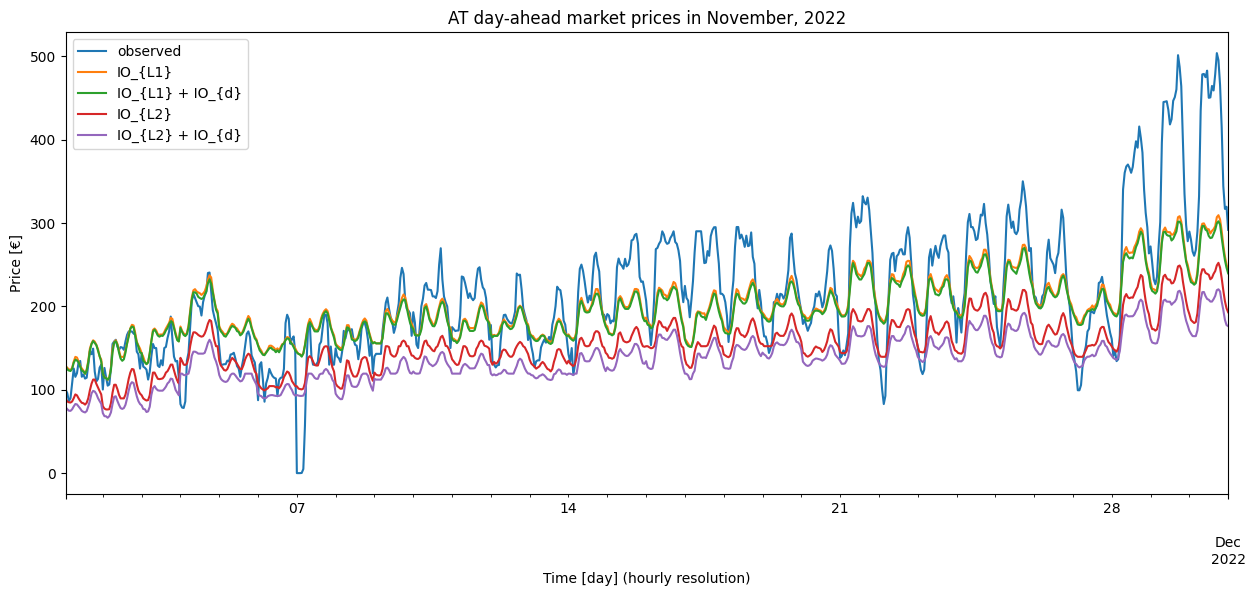

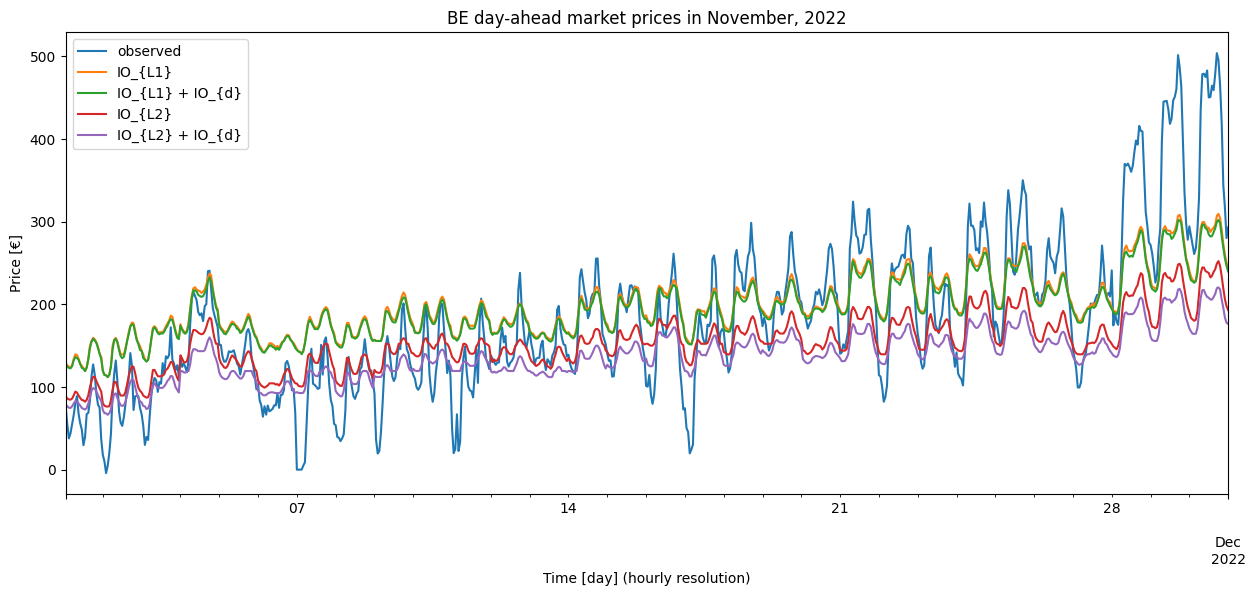

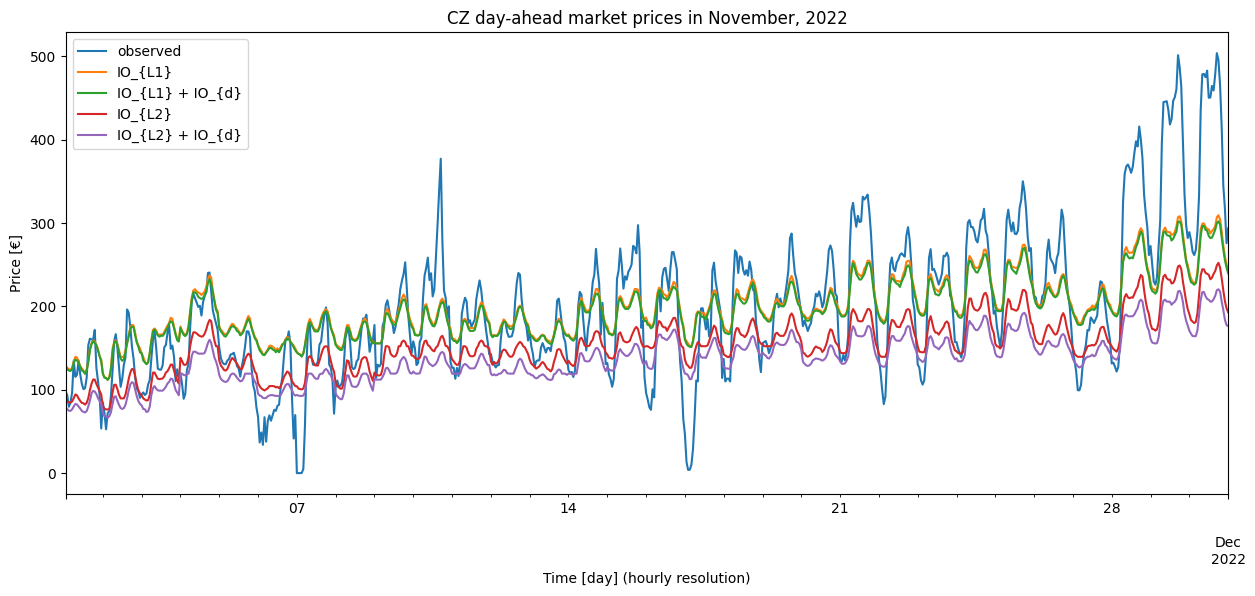

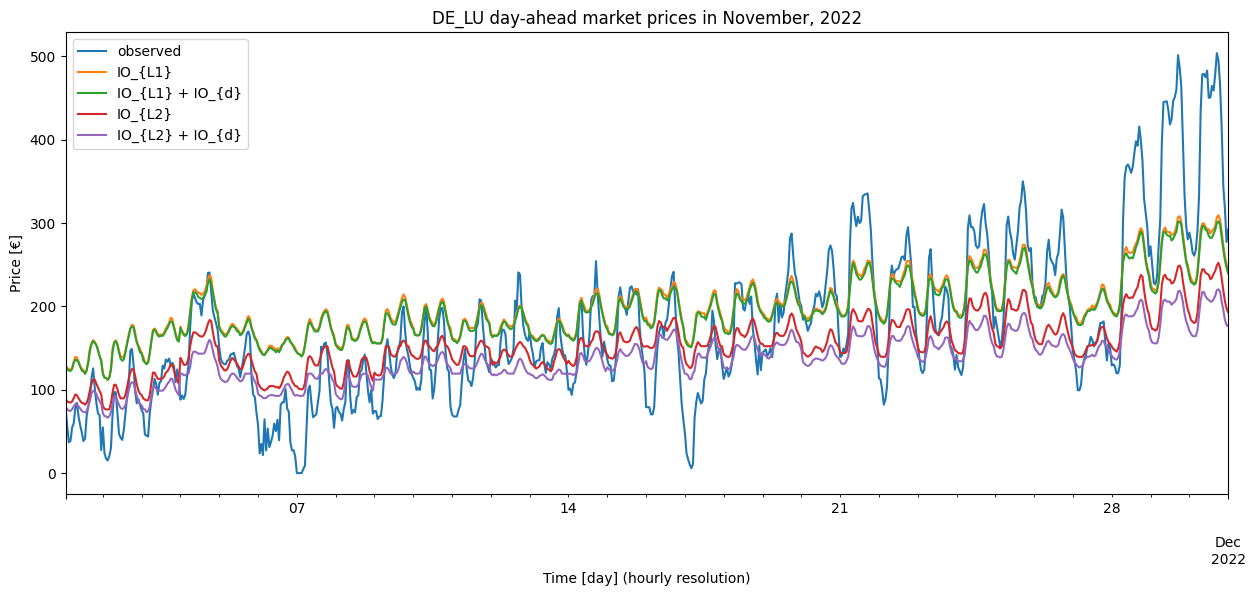

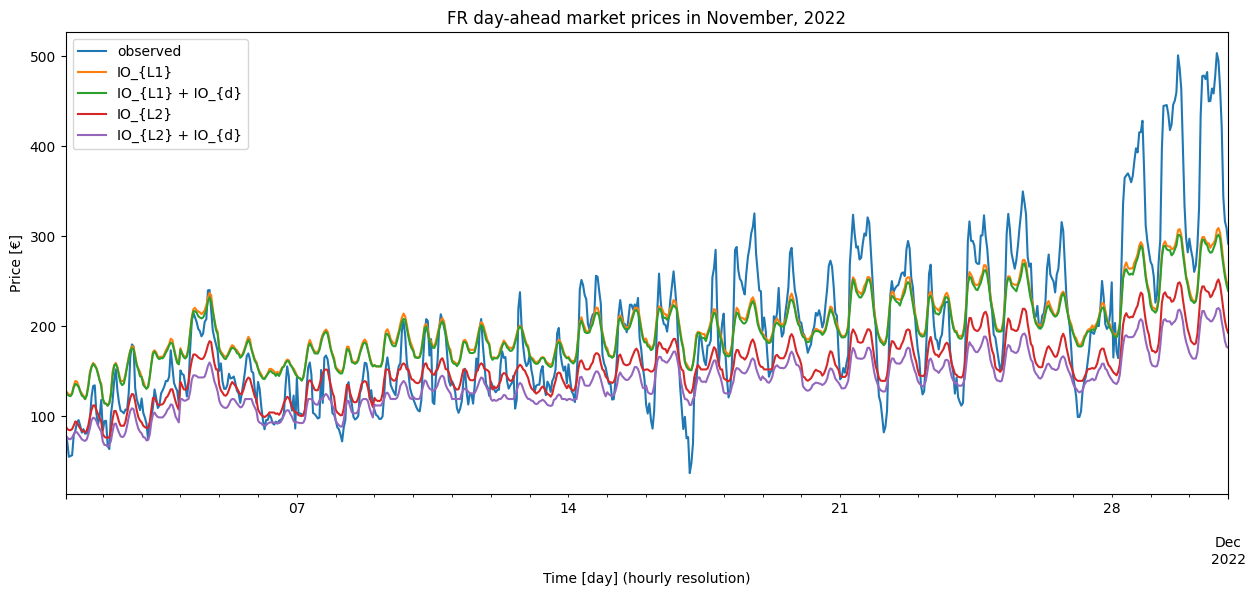

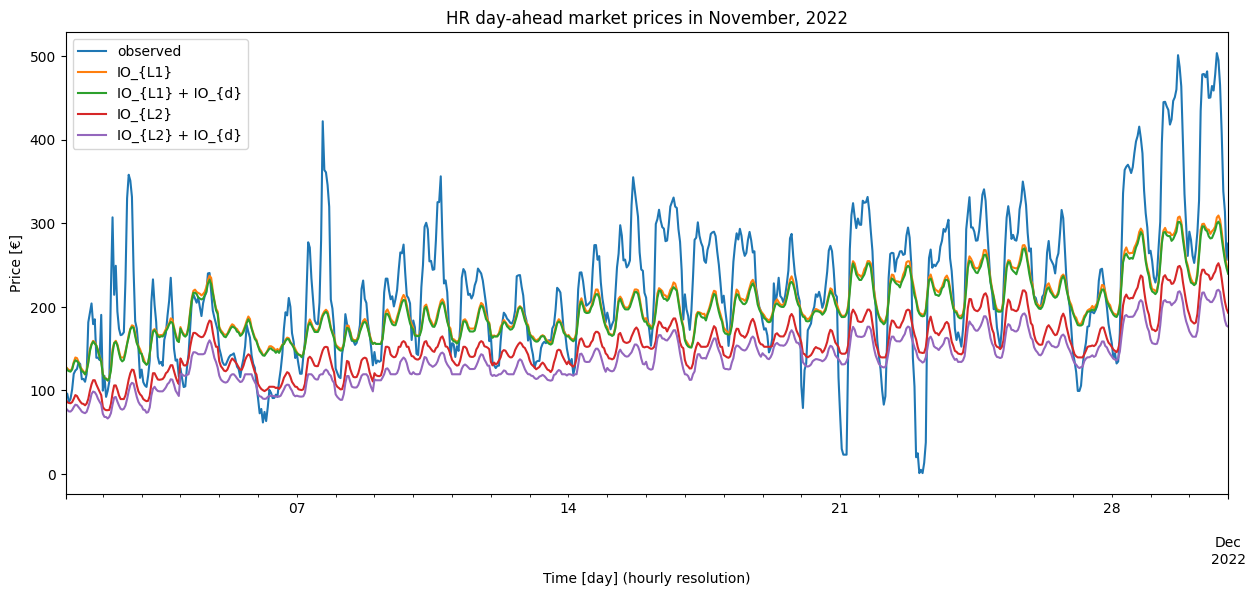

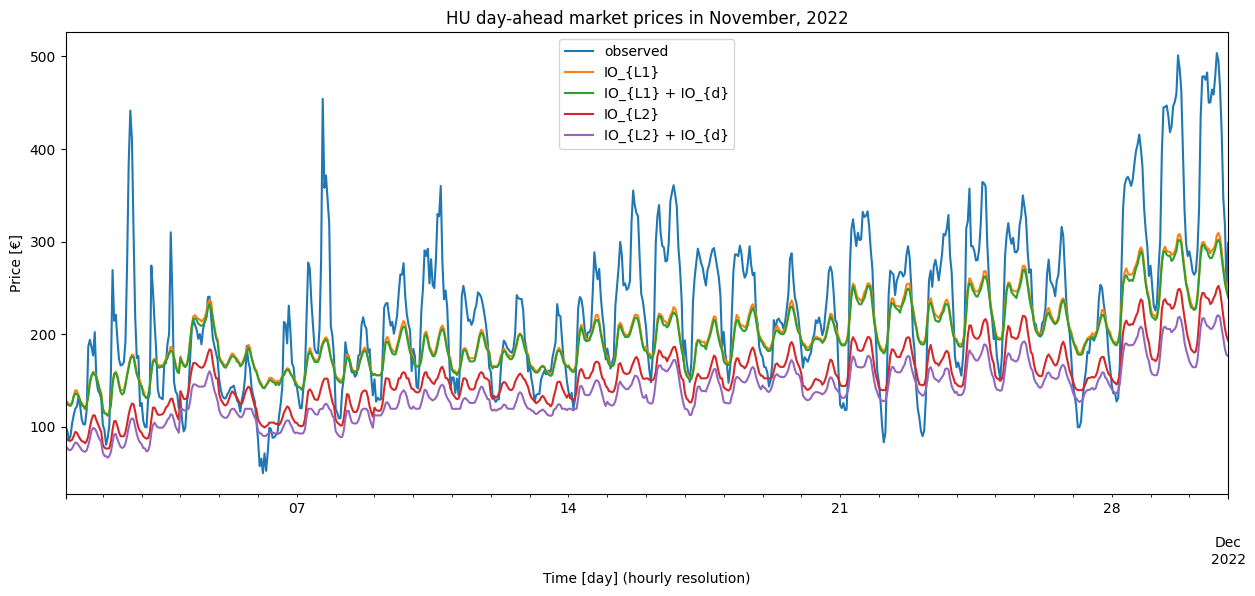

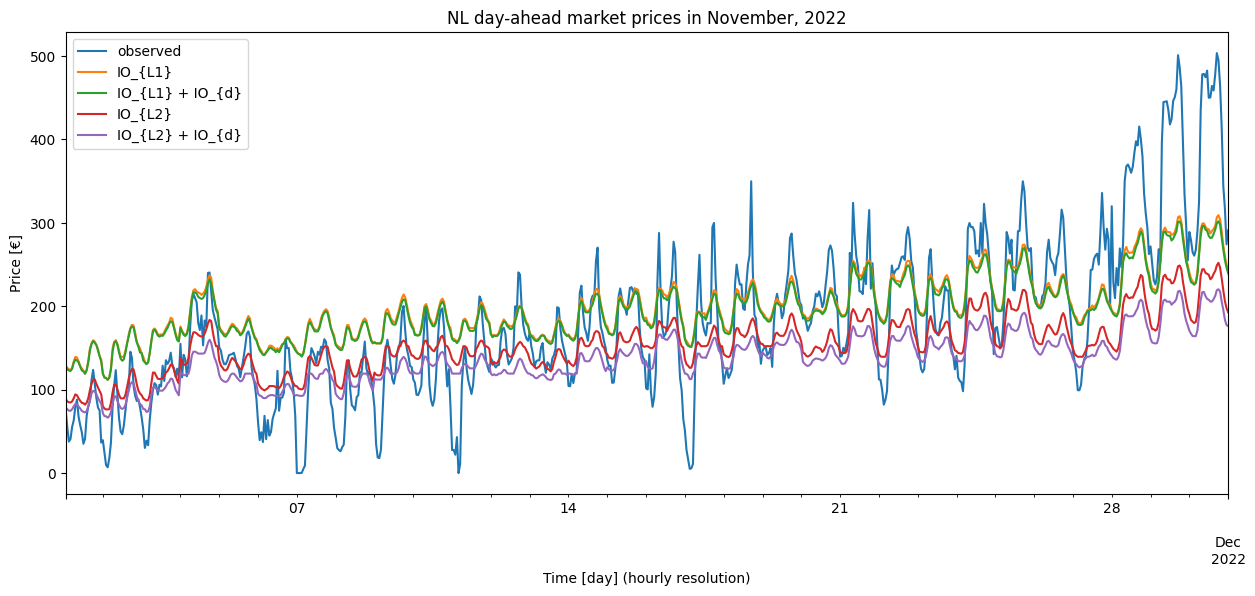

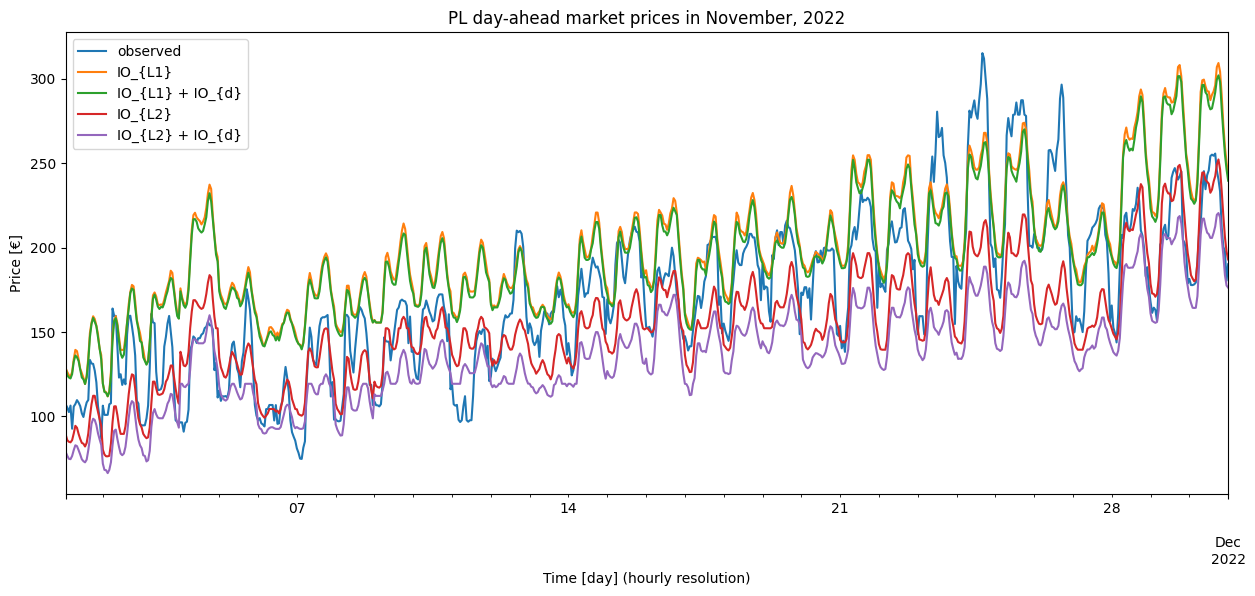

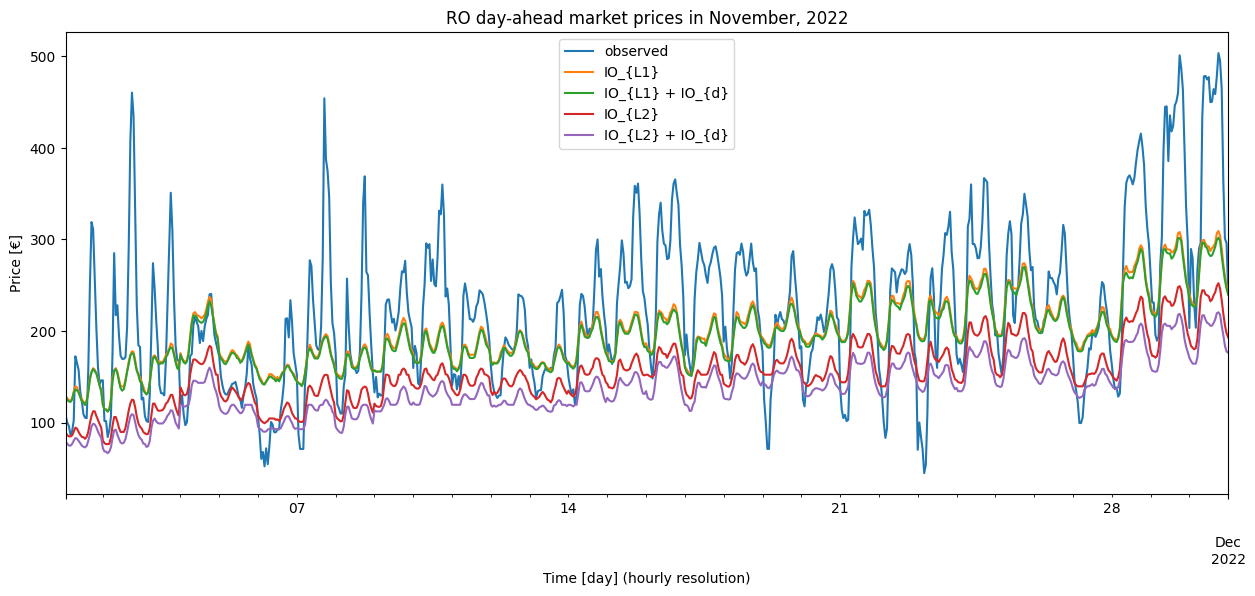

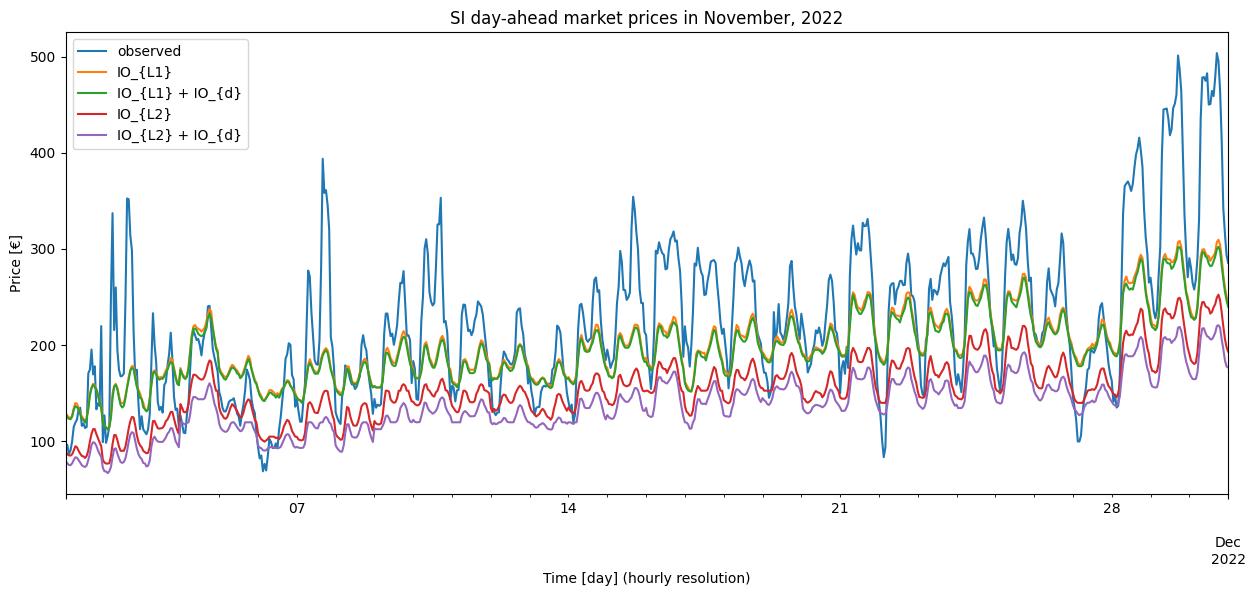

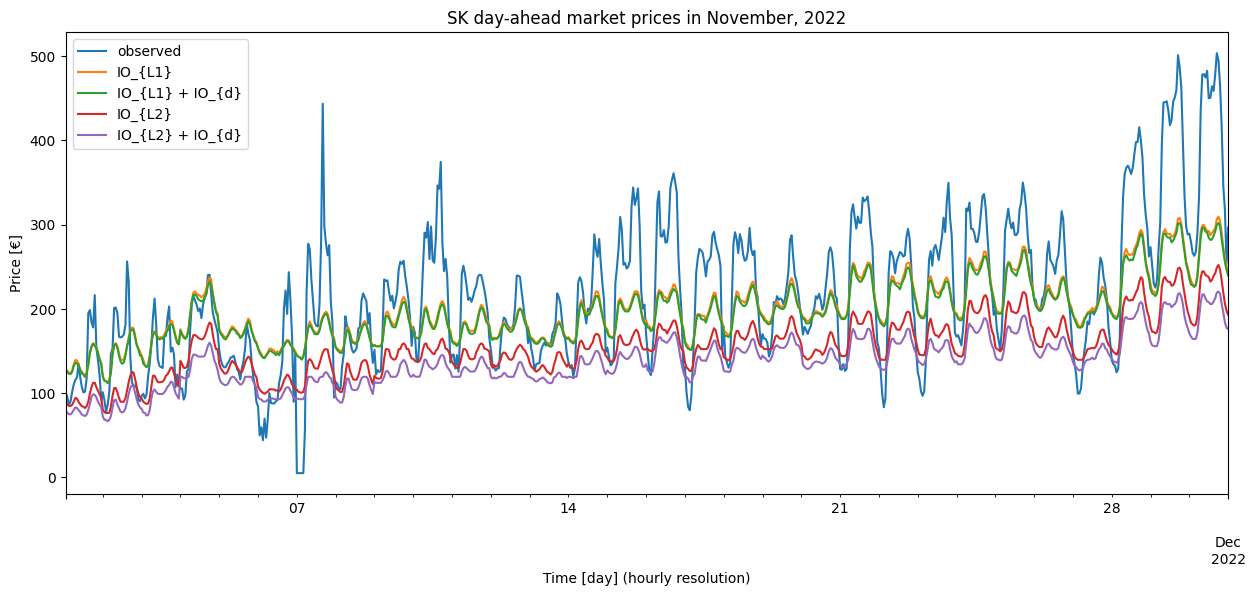

In [4]:
for zone in countries:
    plt.figure(figsize=(15,6))
    ax = df_observed_november[zone].plot()
    for df in df_forecasts_november:
        df[zone].plot(ax=ax)
    
    plt.title("{0} day-ahead market prices in November, 2022".format(zone))
    plt.ylabel('Price [€]')
    plt.xlabel('Time [day] (hourly resolution)')
    ax.legend(['observed'] + forecast_legend)
    plt.show()

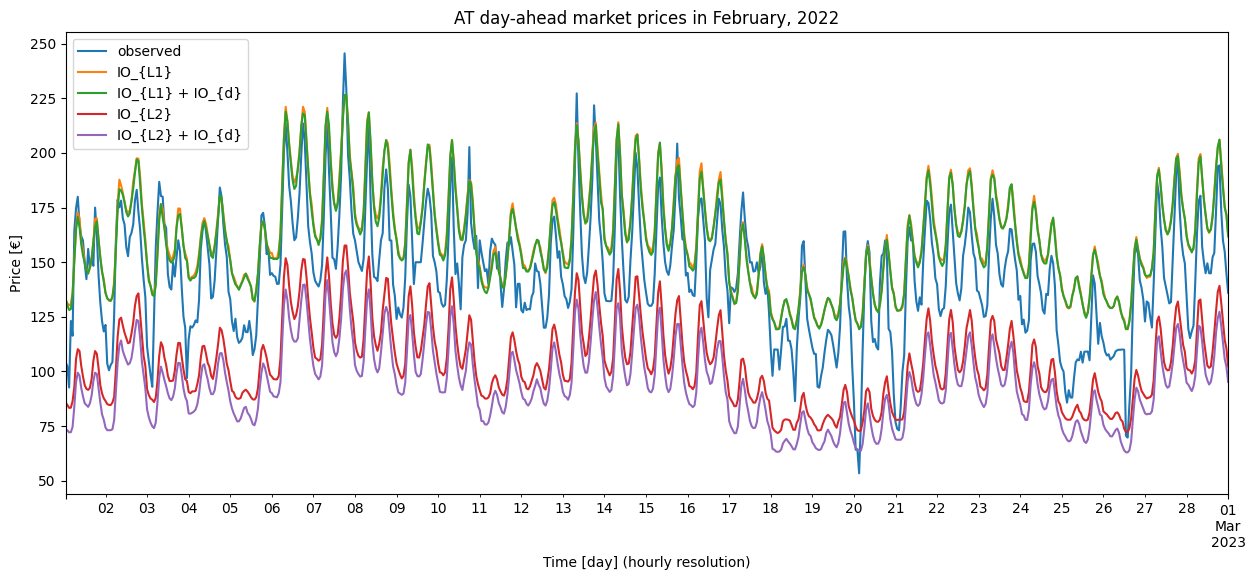

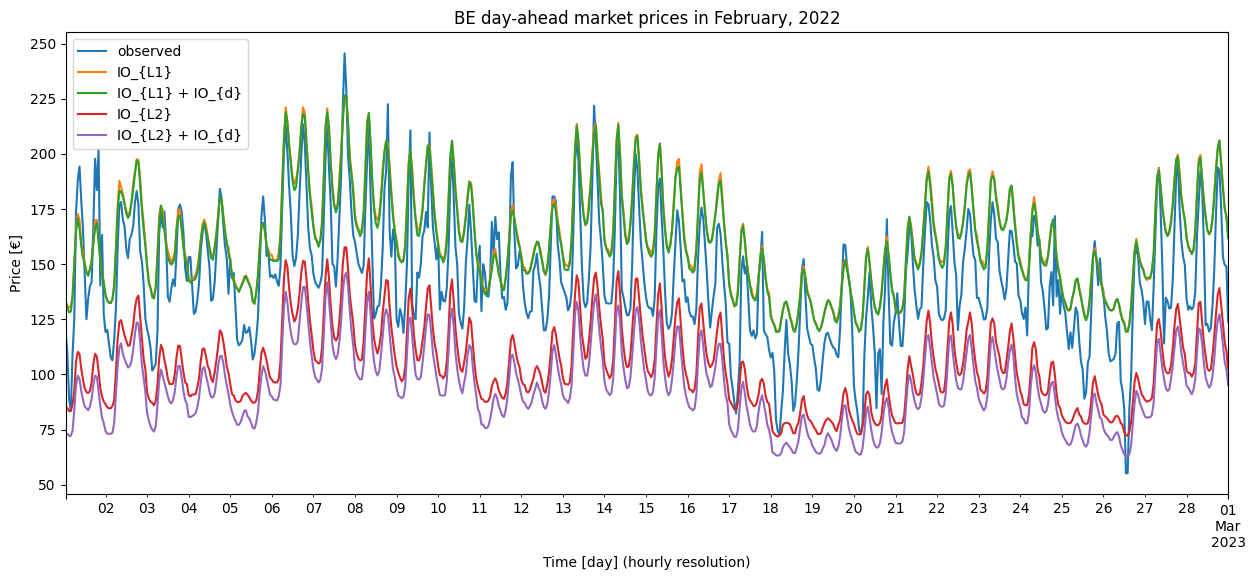

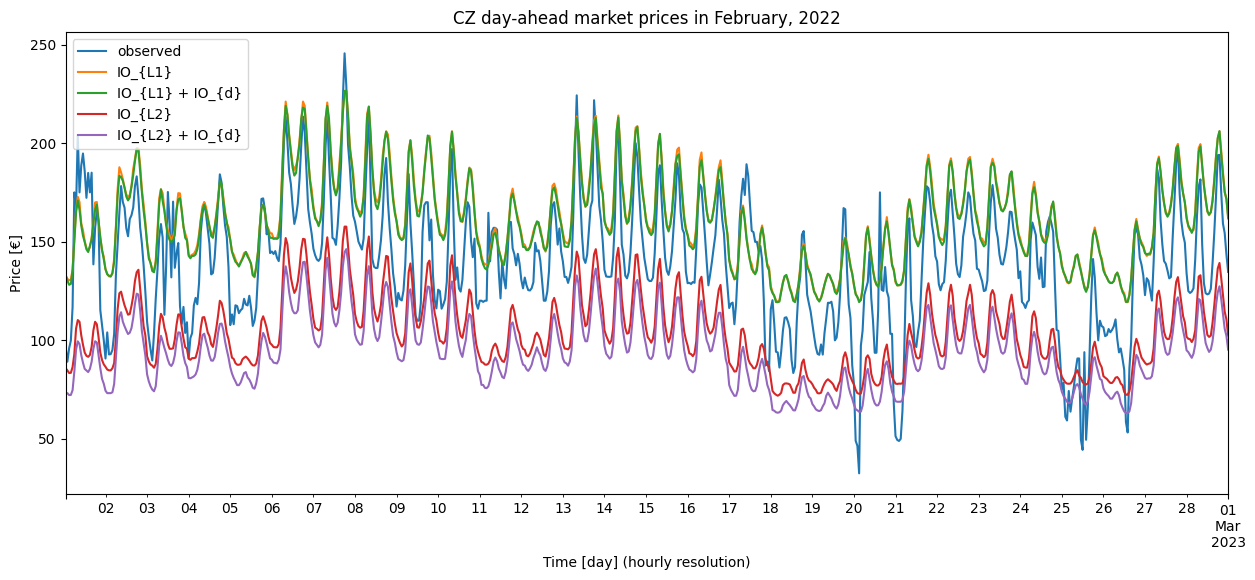

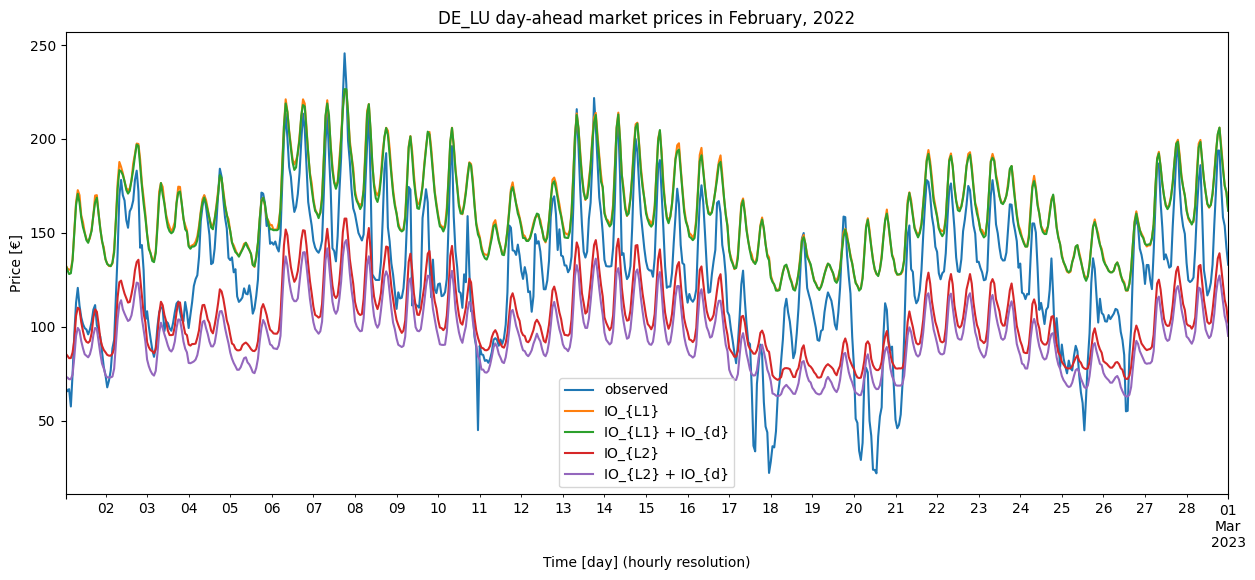

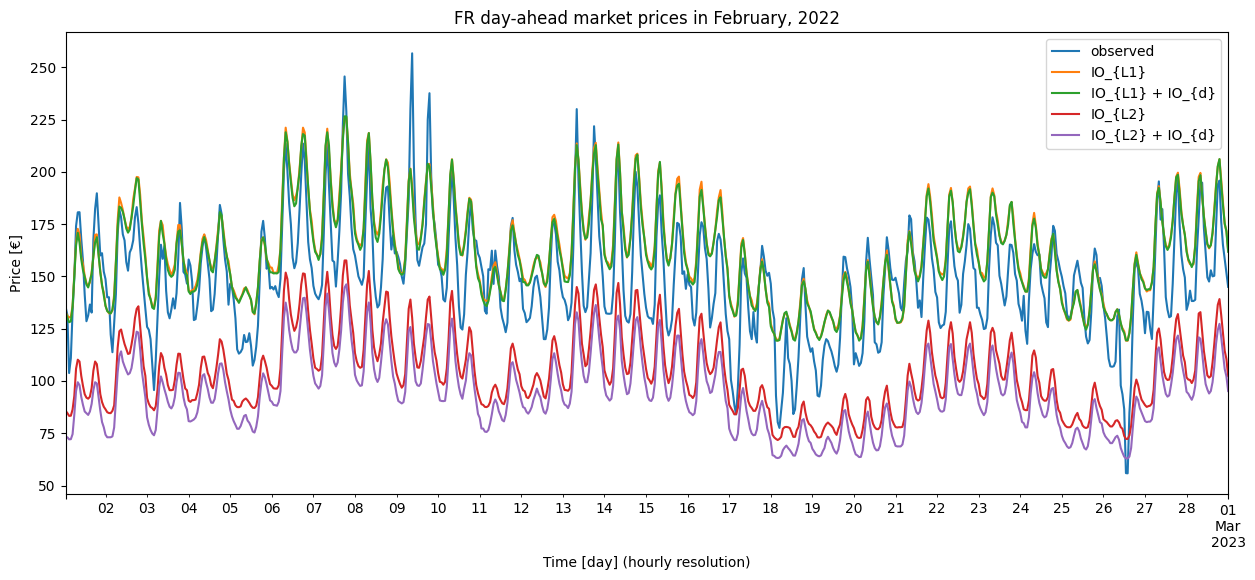

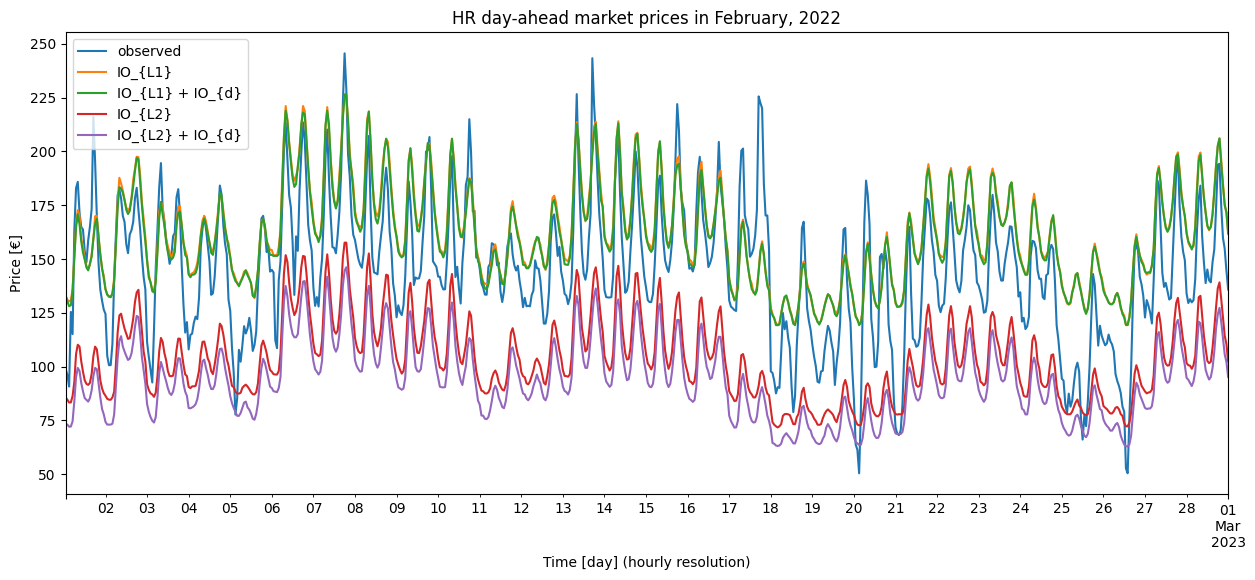

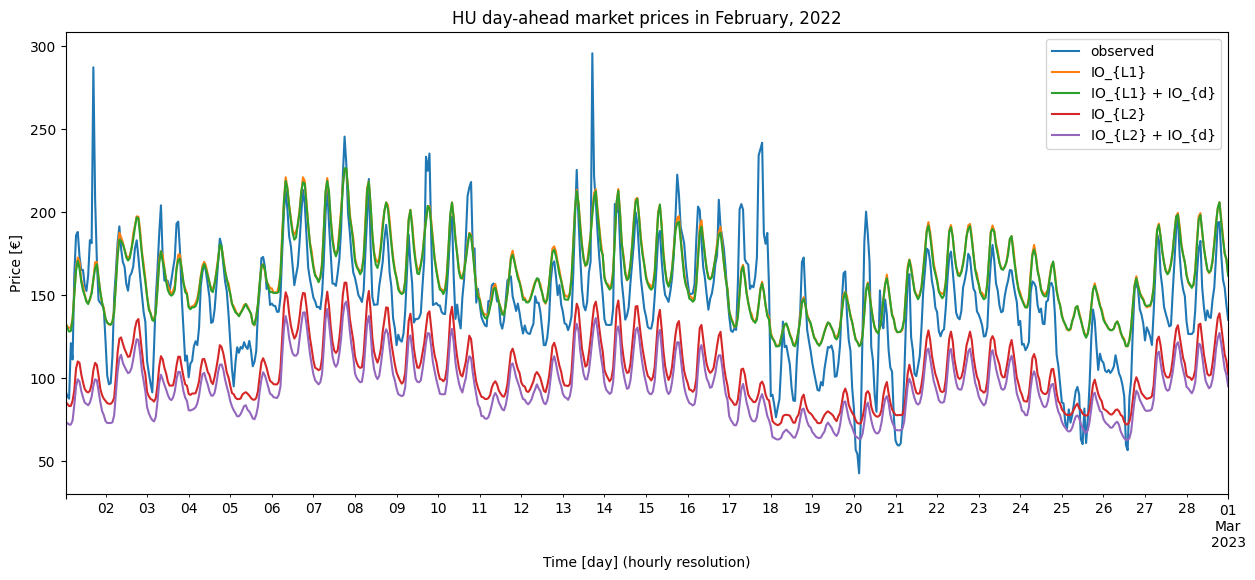

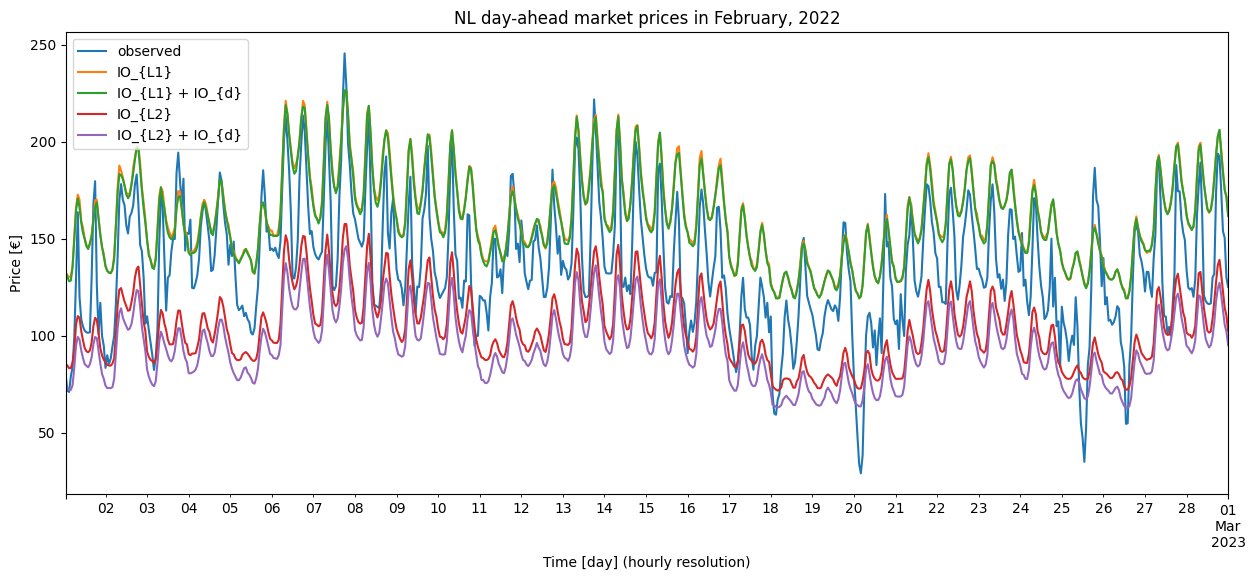

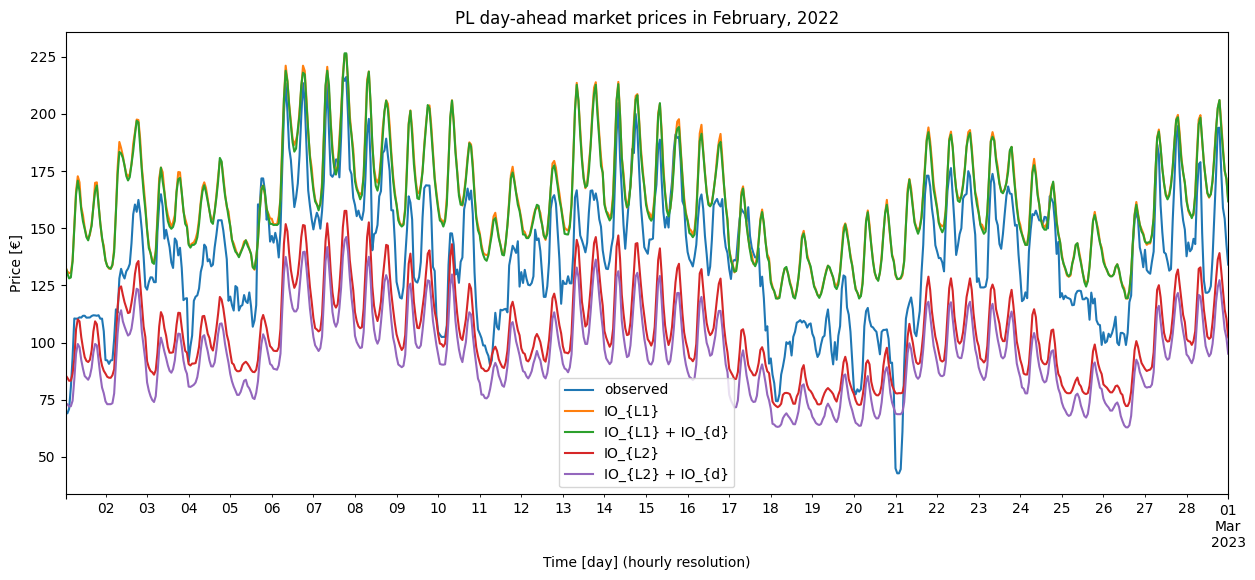

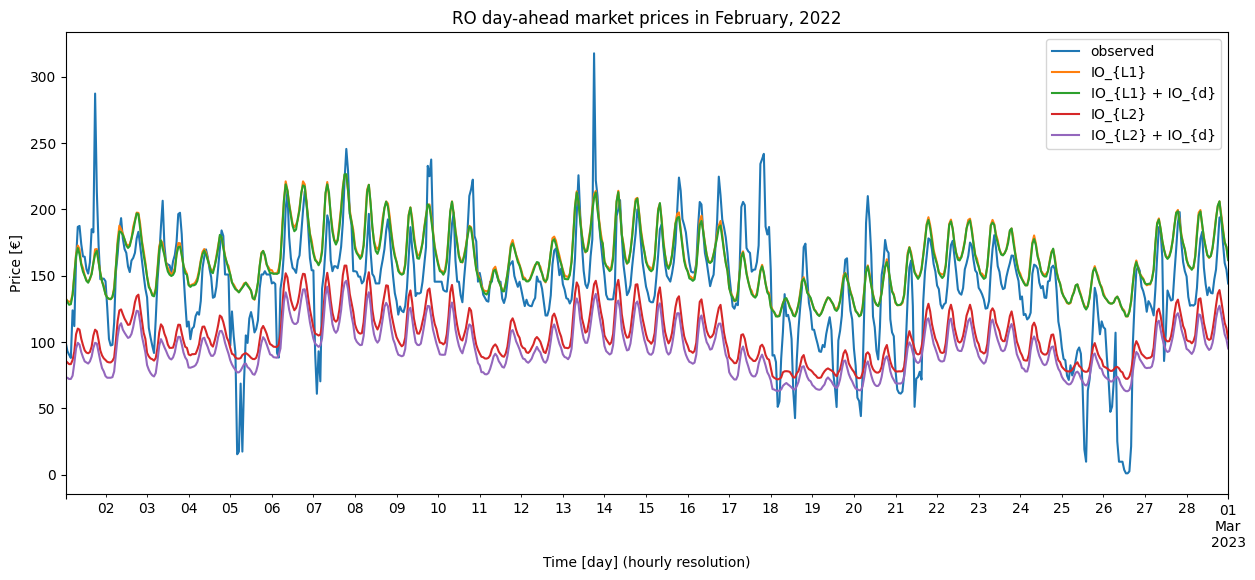

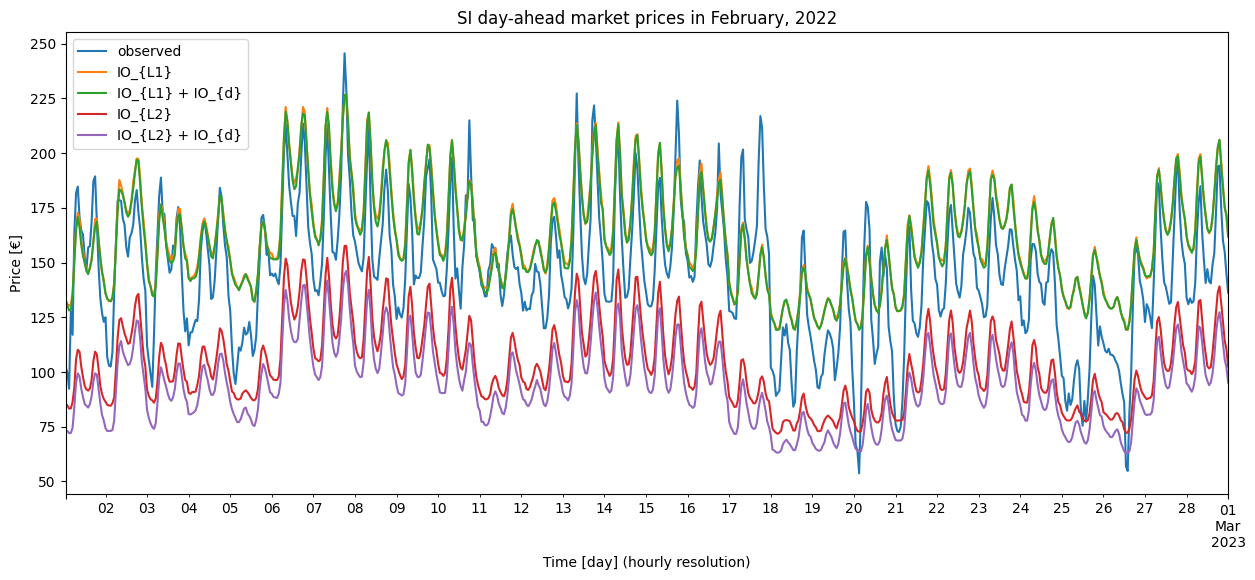

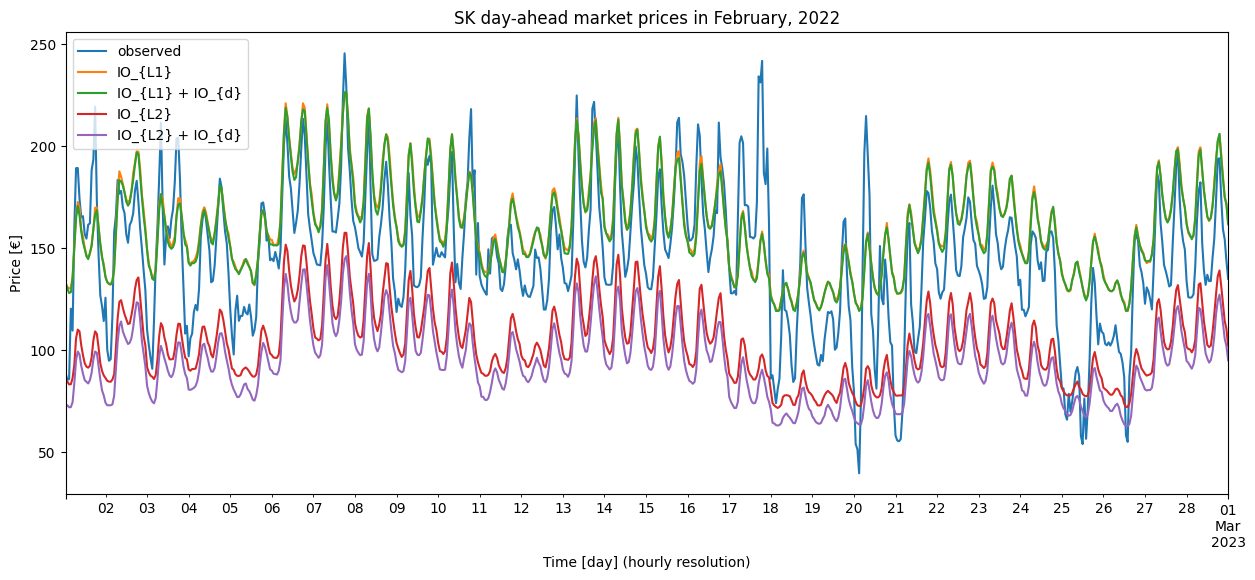

In [5]:
for zone in countries:
    plt.figure(figsize=(15,6))
    ax = df_observed_february[zone].plot()
    for df in df_forecasts_february:
        df[zone].plot(ax=ax)
    
    plt.title("{0} day-ahead market prices in February, 2022".format(zone))
    plt.ylabel('Price [€]')
    plt.xlabel('Time [day] (hourly resolution)')
    ax.legend(['observed'] + forecast_legend)
    plt.show()